# Project Introduction

This project develops a machine learning model for sentiment analysis on movie reviews, aiming to classify reviews as positive or negative. The workflow includes:
- Data collection (real-world datasets like IMDb or Rotten Tomatoes)
- Text preprocessing (cleaning, normalization)
- Model training (Naive Bayes, easily extendable to Logistic Regression/SVM)
- Evaluation (accuracy, classification report)
- Prediction on new reviews

---
# Sentiment Analysis on Movie Reviews

This notebook demonstrates how to perform sentiment analysis on movie reviews using Python. We use a dataset of movie reviews, preprocess the text, train a sentiment analysis model, and test it on sample reviews.

## 1. Import Required Libraries

Let's import the necessary libraries for data processing, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## 2. Load Real-World Movie Reviews Data

To use real-world data, download a dataset (e.g., IMDb, Rotten Tomatoes, or Kaggle) and place the CSV file in your project directory. The file should have columns like 'review' and 'sentiment'.

Uncomment and edit the code in the next cell to load your real dataset. If your column names are different, update the rest of the notebook accordingly.

In [2]:
# Load real-world IMDB data from aclImdb folder
import os
import glob

def load_imdb_data(data_dir):
    reviews = []
    sentiments = []
    for sentiment in ['pos', 'neg']:
        path = os.path.join(data_dir, sentiment, '*.txt')
        for filename in glob.glob(path):
            with open(filename, encoding='utf-8') as f:
                reviews.append(f.read())
                sentiments.append(1 if sentiment == 'pos' else 0)
    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Use train and test sets for full workflow
train_dir = r'aclImdb/train'
test_dir = r'aclImdb/test'
train_df = load_imdb_data(train_dir)
test_df = load_imdb_data(test_dir)

# Combine for EDA, or use separately for modeling
# For EDA, you can use train_df
# For modeling, use train_df for training and test_df for testing

df = train_df  # For EDA and preprocessing

df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


## 3. Line Plot

Let's visualize the distribution of sentiments in our sample data using a line plot.

In [9]:
df['sentiment'].value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [10]:
df['sentiment'].value_counts().sort_index()

sentiment
0    12500
1    12500
Name: count, dtype: int64

Number of reviews loaded: 25000
sentiment
1    12500
0    12500
Name: count, dtype: int64


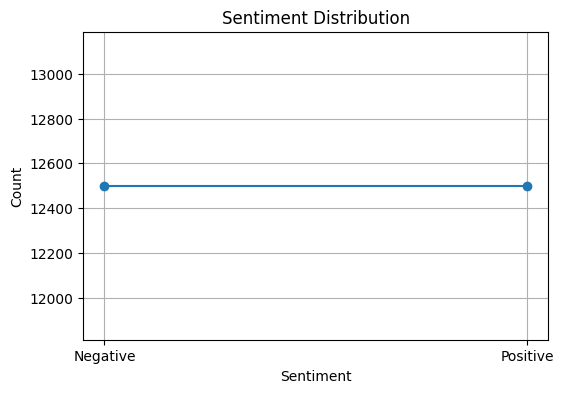

In [3]:
sentiment_counts = df['sentiment'].value_counts().sort_index()
print("Number of reviews loaded:", len(df))
print(df['sentiment'].value_counts())
sentiment_counts = df['sentiment'].value_counts().sort_index()
if not sentiment_counts.empty:
    plt.figure(figsize=(6,4))
    plt.plot(['Negative', 'Positive'], sentiment_counts, marker='o')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
else:
    print("No sentiment data available for plotting.")

## 4. Bar Chart

Now, let's visualize the sentiment distribution using a bar chart.

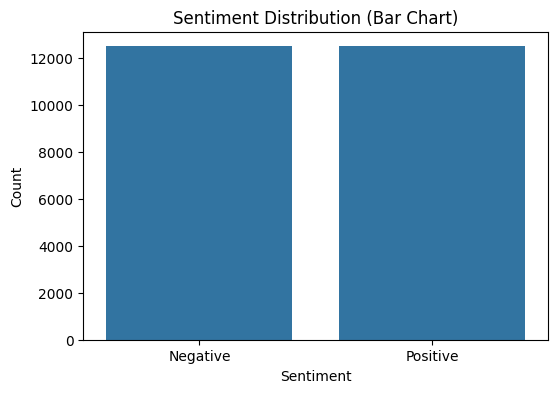

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Negative', 'Positive'], y=sentiment_counts.values)
plt.title('Sentiment Distribution (Bar Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 5. Scatter Plot

Let's create a scatter plot to visualize the length of each review versus its sentiment.

In [12]:
df['review'].apply(len)

0         806
1        2366
2         841
3         663
4         647
         ... 
24995    1567
24996     859
24997    1688
24998    1277
24999     746
Name: review, Length: 25000, dtype: int64

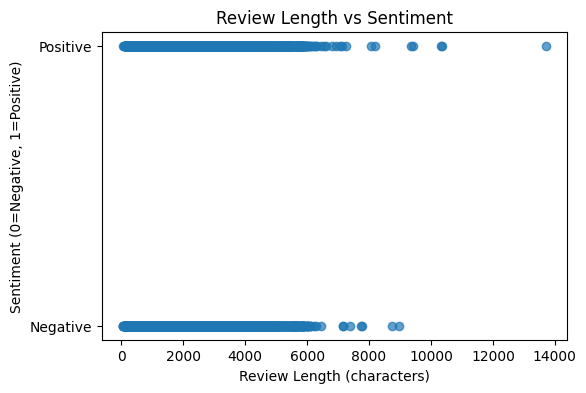

In [5]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(6,4))
plt.scatter(df['review_length'], df['sentiment'], alpha=0.7)
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Sentiment (0=Negative, 1=Positive)')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [13]:
# Text Preprocessing: Noise Removal and Normalization
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(preprocess_text)
df[['review', 'clean_review']].head(10)

,review,clean_review
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high cartoon comedy ran time programs...
1,Homelessness (or Houselessness as George Carli...,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting lesley ann warren best dr...
3,This is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...
4,This is not the typical Mel Brooks film. It wa...,typical mel brooks film slapstick movies actua...
5,"This isn't the comedic Robin Williams, nor is ...",isnt comedic robin williams quirkyinsane robin...
6,Yes its an art... to successfully make a slow ...,yes art successfully make slow paced thrillerb...
7,"In this ""critically acclaimed psychological th...",critically acclaimed psychological thriller ba...
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,night listener robin williams toni collette bo...
9,"You know, Robin Williams, God bless him, is co...",know robin williams god bless constantly shoot...


## 6. Feature Extraction, Model Training, and Evaluation

Now, let's split the data, extract features, train a Naive Bayes classifier, and evaluate its performance.

In [ ]:
## 6. Feature Extraction, Model Training, and Evaluation (Improved)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Use the cleaned reviews for modeling
X = df['clean_review']
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# TF-IDF with unigrams + bigrams
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),     # unigrams + bigrams
    max_features=20000     # cap features for efficiency
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Try Logistic Regression (strong baseline)
log_reg = LogisticRegression(max_iter=2000, C=2, class_weight='balanced')
log_reg.fit(X_train_vec, y_train)
y_pred = log_reg.predict(X_test_vec)

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred, zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8822666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3750
           1       0.87      0.90      0.88      3750

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

Confusion Matrix:
 [[3259  491]
 [ 392 3358]]


## 7. Predict Sentiment for New Reviews

Let's use the trained model to predict the sentiment of new, unseen movie reviews.

In [15]:
# Example new reviews
new_reviews = [
    "This movie was a fantastic experience!",
    "I didn't like the film, it was boring.",
    "The acting was great but the story was weak.",
    "Absolutely loved the visuals and music!"
]

# Transform and predict
new_reviews_vec = vectorizer.transform(new_reviews)
predictions = log_reg.predict(new_reviews_vec)

for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: "{review}"')
    print(f'Predicted Sentiment: {"Positive" if sentiment == 1 else "Negative"}\n')

Review: "This movie was a fantastic experience!"
Predicted Sentiment: Positive

Review: "I didn't like the film, it was boring."
Predicted Sentiment: Negative

Review: "The acting was great but the story was weak."
Predicted Sentiment: Positive

Review: "Absolutely loved the visuals and music!"
Predicted Sentiment: Positive



In [ ]:
import joblib

# Save trained model and vectorizer
joblib.dump(log_reg, "sentiment_model.pkl")       # or svm_model
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

# Project Summary: Sentiment Analysis on Movie Reviews

**Objective:**
Build a machine learning model to classify movie reviews as positive or negative using natural language processing (NLP) techniques and data visualization.

**Key Skills Demonstrated:**
- Data preprocessing and feature engineering
- Exploratory data analysis and visualization (Matplotlib, Seaborn)
- Text vectorization (Bag-of-Words)
- Model training and evaluation (Naive Bayes)
- Python, pandas, scikit-learn, matplotlib, seaborn

**Project Impact:**
This project showcases the ability to apply NLP and machine learning to real-world text data, providing actionable insights into customer sentiment for the entertainment industry.

---